#  Getting all company pricing data of NASDAQ 100

In [1]:
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web

In [2]:
def save_nasdaq100_tickers():
    key = '8548d92610e0e960befee2d664c98c38'
    resp = requests.get(f'https://financialmodelingprep.com/api/v3/nasdaq_constituent?apikey={key}').json()
    tickers = [data['symbol'] for data in resp]
        
    with open("nasdaq100tickers.pickle","wb") as f: 
        pickle.dump(tickers,f)
    
    print(tickers)

save_nasdaq100_tickers()

['DOCU', 'ZM', 'DXCM', 'SPLK', 'SGEN', 'CDW', 'INTC', 'XEL', 'GILD', 'TTWO', 'CHTR', 'ASML', 'FISV', 'AMAT', 'MXIM', 'MU', 'CTSH', 'PCAR', 'PYPL', 'INCY', 'JD', 'WBA', 'COST', 'GOOG', 'NXPI', 'TSLA', 'REGN', 'FB', 'TXN', 'TCOM', 'CHKP', 'CERN', 'EA', 'INTU', 'ADP', 'VRTX', 'ISRG', 'EXPE', 'CMCSA', 'AMZN', 'SBUX', 'BIIB', 'VRSN', 'DLTR', 'XLNX', 'SNPS', 'ROST', 'MSFT', 'MCHP', 'IDXX', 'FAST', 'CTAS', 'AAPL', 'AMGN', 'ADBE', 'PDD', 'MRNA', 'CPRT', 'ANSS', 'EXC', 'FOXA', 'FOX', 'LULU', 'AMD', 'PEP', 'KHC', 'WDAY', 'LBTYA', 'ALGN', 'MELI', 'NTES', 'CSX', 'ULTA', 'TMUS', 'SWKS', 'BMRN', 'LBTYK', 'EBAY', 'BIDU', 'MAR', 'CTXS', 'WDC', 'VRSK', 'QCOM', 'ADI', 'MDLZ', 'CDNS', 'AVGO', 'ALXN', 'NFLX', 'BKNG', 'ORLY', 'ILMN', 'MNST', 'GOOGL', 'ATVI', 'SIRI', 'LRCX', 'NVDA', 'PAYX', 'KLAC', 'CSCO', 'ADSK']


In [3]:
def get_data_from_yahoo(reload_nasdaq100=False):
    if reload_nasdaq100:
        tickers=save_nasdaq100_tickers()
    else:
        with open("nasdaq100tickers.pickle","rb") as f:
            tickers=pickle.load(f)
    if not os.path.exists('stock_dfs2'):
        os.makedirs('stock_dfs2')
       
    start= dt.datetime(2000,1,1)
    end= dt.datetime(2020,10,31)
   
    for ticker in tickers[:]:
        print('Getting data from: ', ticker)
        if not os.path.exists('stock_dfs2/{}.csv'.format(ticker)):
            try:
                df=web.get_data_yahoo(ticker,start,end)
                df.to_csv('stock_dfs2/{}.csv'.format(ticker))
            except:
                print("Data doesn't exist")  #print companies that doesn't have data between 2000 and 2016
        else:
            print('Already have {}'.format(ticker))

In [4]:
get_data_from_yahoo()

Getting data from:  DOCU
Already have DOCU
Getting data from:  ZM
Already have ZM
Getting data from:  DXCM
Already have DXCM
Getting data from:  SPLK
Already have SPLK
Getting data from:  SGEN
Already have SGEN
Getting data from:  CDW
Already have CDW
Getting data from:  INTC
Already have INTC
Getting data from:  XEL
Already have XEL
Getting data from:  GILD
Already have GILD
Getting data from:  TTWO
Already have TTWO
Getting data from:  CHTR
Already have CHTR
Getting data from:  ASML
Already have ASML
Getting data from:  FISV
Already have FISV
Getting data from:  AMAT
Already have AMAT
Getting data from:  MXIM
Already have MXIM
Getting data from:  MU
Already have MU
Getting data from:  CTSH
Already have CTSH
Getting data from:  PCAR
Already have PCAR
Getting data from:  PYPL
Already have PYPL
Getting data from:  INCY
Already have INCY
Getting data from:  JD
Already have JD
Getting data from:  WBA
Already have WBA
Getting data from:  COST
Already have COST
Getting data from:  GOOG
Alre

In [5]:
def compile_data():
    with open("nasdaq100tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs2\{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)

            df.rename(columns={'Adj Close': ticker}, inplace=True)
            df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')
        except Exception as e:
            print(e) #prints out those tickers without file

    print(main_df.head())
    main_df.to_csv('nasdaq100_joined_closes.csv')


compile_data()

            DOCU  ZM  DXCM  SPLK  SGEN  CDW       INTC       XEL      GILD  \
Date                                                                         
1999-12-31   NaN NaN   NaN   NaN   NaN  NaN  25.861286  7.884650  1.439923   
2000-01-03   NaN NaN   NaN   NaN   NaN  NaN  27.334038  7.682479  1.498119   
2000-01-04   NaN NaN   NaN   NaN   NaN  NaN  26.057665  7.859379  1.429947   
2000-01-05   NaN NaN   NaN   NaN   NaN  NaN  26.273663  8.162634  1.418308   
2000-01-06   NaN NaN   NaN   NaN   NaN  NaN  24.742018  8.086820  1.514746   

                TTWO  ...      MNST  GOOGL      ATVI       SIRI       LRCX  \
Date                  ...                                                    
1999-12-31  8.624468  ...  0.089844    NaN  1.143539  42.224285  33.468281   
2000-01-03  9.124436  ...  0.089844    NaN  1.227554  39.021885  33.712025   
2000-01-04  8.874452  ...  0.085938    NaN  1.190215  36.412514  32.249546   
2000-01-05  8.832788  ...  0.085938    NaN  1.194882  38.250938

# Portfolio Optimisation  

In [6]:
# Go to https://www.cvxpy.org/install/index.html 
# You have to install Visual Studio build tools for Python 3 first before running pip install cvxpy

In [7]:
from cvxpy import *

In [8]:
df = pd.read_csv('nasdaq100_joined_closes.csv')
df.head()

,Date,DOCU,ZM,DXCM,SPLK,SGEN,CDW,INTC,XEL,GILD,...,MNST,GOOGL,ATVI,SIRI,LRCX,NVDA,PAYX,KLAC,CSCO,ADSK
0,1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,25.861286,7.884650,1.439923,...,0.089844,NaN,1.143539,42.224285,33.468281,3.597306,14.712866,30.918825,40.380596,8.143387
1,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,27.334038,7.682479,1.498119,...,0.089844,NaN,1.227554,39.021885,33.712025,3.587727,14.712866,30.120689,40.733959,8.052903
2,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,26.057665,7.859379,1.429947,...,0.085938,NaN,1.190215,36.412514,32.249546,3.491927,13.609405,28.836750,38.448730,7.660817
3,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,26.273663,8.162634,1.418308,...,0.085938,NaN,1.194882,38.250938,31.780813,3.376966,14.414016,27.396648,38.330936,7.178246
4,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,24.742018,8.086820,1.514746,...,0.088542,NaN,1.171544,39.377701,31.555807,3.156626,14.942760,27.604858,37.694832,6.740915


In [9]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,DOCU,ZM,DXCM,SPLK,SGEN,CDW,INTC,XEL,GILD,...,ATVI,SIRI,LRCX,NVDA,PAYX,KLAC,CSCO,ADSK,year,month
0,1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,25.861286,7.884650,1.439923,...,1.143539,42.224285,33.468281,3.597306,14.712866,30.918825,40.380596,8.143387,1999,12
1,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,27.334038,7.682479,1.498119,...,1.227554,39.021885,33.712025,3.587727,14.712866,30.120689,40.733959,8.052903,2000,1
2,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,26.057665,7.859379,1.429947,...,1.190215,36.412514,32.249546,3.491927,13.609405,28.836750,38.448730,7.660817,2000,1
3,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,26.273663,8.162634,1.418308,...,1.194882,38.250938,31.780813,3.376966,14.414016,27.396648,38.330936,7.178246,2000,1
4,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,24.742018,8.086820,1.514746,...,1.171544,39.377701,31.555807,3.156626,14.942760,27.604858,37.694832,6.740915,2000,1


In [10]:
# choose the most recent five years to focus on
df = df[df['year']>2015]
# remove columns with all NA
df.dropna(axis=1,how='all',inplace=True)
# compute monthly average
df2 = df.iloc[:,1:].groupby(['year','month']).mean().reset_index()
df2.head()

,year,month,DOCU,ZM,DXCM,SPLK,SGEN,CDW,INTC,XEL,...,MNST,GOOGL,ATVI,SIRI,LRCX,NVDA,PAYX,KLAC,CSCO,ADSK
0,2016,1,NaN,NaN,74.772632,50.531052,37.221053,36.426842,27.271888,31.713584,...,47.421403,736.656844,34.345990,3.614480,64.955010,28.614124,40.868939,58.048211,20.892498,51.662106
1,2016,2,NaN,NaN,62.913999,37.420500,30.309501,35.022569,25.738194,34.076277,...,42.319667,724.389996,29.859206,3.427475,63.730824,28.015550,42.511454,58.317440,21.333116,47.377999
2,2016,3,NaN,NaN,63.492728,47.115909,33.422727,38.557628,27.852768,35.475281,...,44.074242,746.787270,31.132856,3.771215,71.596104,32.731190,45.733595,62.417928,23.766949,56.875455
3,2016,4,NaN,NaN,67.537143,50.093333,37.585715,39.188352,27.940634,35.323790,...,43.249841,756.608570,33.592904,3.778243,74.998326,35.615460,45.532342,64.333095,24.293938,58.660952
4,2016,5,NaN,NaN,62.942857,50.768095,36.368572,39.037767,26.998393,35.726540,...,49.674127,726.529524,36.536906,3.801710,70.628055,39.759097,45.361514,62.449333,23.705556,58.545714


In [11]:
#https://github.com/tirthajyoti/Optimization-Python/blob/master/Portfolio_optimization.ipynb

In [12]:
import random

# randomly choose five stocks to optimise
stocks_to_opt = random.sample(list(df2)[2:],5)
print(stocks_to_opt)

['TMUS', 'FB', 'EA', 'ILMN', 'GILD']


In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [14]:
df2.shape

(58, 105)

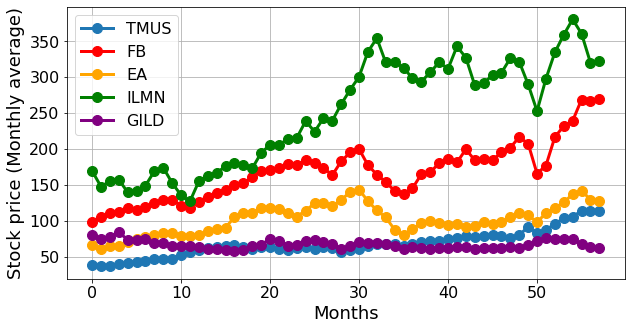

In [15]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(0,df2.shape[0])],df2[stocks_to_opt[0]],lw=3,marker='o',markersize=10)
plt.plot([i for i in range(0,df2.shape[0])],df2[stocks_to_opt[1]],lw=3,c='red',marker='o',markersize=10)
plt.plot([i for i in range(0,df2.shape[0])],df2[stocks_to_opt[2]],lw=3,c='orange',marker='o',markersize=10)
plt.plot([i for i in range(0,df2.shape[0])],df2[stocks_to_opt[3]],lw=3,c='green',marker='o',markersize=10)
plt.plot([i for i in range(0,df2.shape[0])],df2[stocks_to_opt[4]],lw=3,c='purple',marker='o',markersize=10)
plt.legend(df2[stocks_to_opt].columns,fontsize=16)
plt.xlabel("Months",fontsize=18)
plt.ylabel("Stock price (Monthly average)",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()


In [16]:
# compute monthly returns
mr = []
for s in df2[stocks_to_opt].columns:
    date = df2[stocks_to_opt].index[0]
    pr0 = df2[stocks_to_opt][s][date] 
    for t in range(1,len(df2[stocks_to_opt].index)):
        date = df2[stocks_to_opt].index[t]
        pr1 = df2[stocks_to_opt][s][date]
        ret = (pr1-pr0)/pr0
        mr.append((date,s,ret))
        #mr.set_value(date,s,ret)
        pr0 = pr1


In [17]:
mr = pd.DataFrame(mr)
mr.columns = ['month','s','ret']
mr = mr.pivot(index='month', columns='s', values='ret').reset_index()
mr.head()

s,month,EA,FB,GILD,ILMN,TMUS
0,1,-0.088536,0.070103,-0.057566,-0.129594,-0.061862
1,2,0.072268,0.045878,0.032943,0.049101,0.035090
2,3,0.002106,0.010415,0.085362,0.015842,0.042847
3,4,0.092809,0.058342,-0.131576,-0.111074,0.036512
4,5,0.058758,-0.026895,-0.007685,0.008084,0.042843


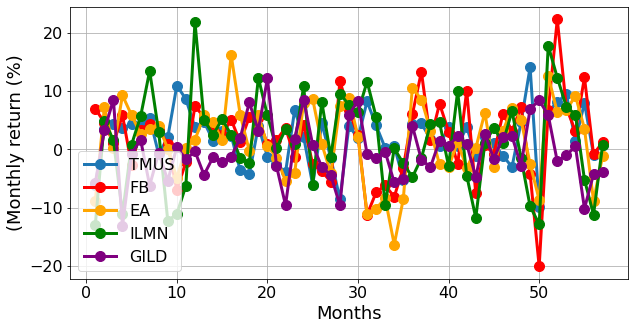

In [18]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,mr.shape[0]+1)],100*mr[stocks_to_opt[0]],lw=3,marker='o',markersize=10)
plt.plot([i for i in range(1,mr.shape[0]+1)],100*mr[stocks_to_opt[1]],lw=3,c='red',marker='o',markersize=10)
plt.plot([i for i in range(1,mr.shape[0]+1)],100*mr[stocks_to_opt[2]],lw=3,c='orange',marker='o',markersize=10)
plt.plot([i for i in range(1,mr.shape[0]+1)],100*mr[stocks_to_opt[3]],lw=3,c='green',marker='o',markersize=10)
plt.plot([i for i in range(1,mr.shape[0]+1)],100*mr[stocks_to_opt[4]],lw=3,c='purple',marker='o',markersize=10)
plt.legend(df2[stocks_to_opt].columns,fontsize=16)
plt.xlabel("Months",fontsize=18)
plt.ylabel("(Monthly return (%)",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()


In [19]:
return_data = mr[stocks_to_opt].values.T

# mean return
r = np.asarray(np.mean(return_data, axis=1))
# covariance matrix
C = np.asmatrix(np.cov(return_data))
C

matrix([[ 0.00219675,  0.00051506,  0.00046468,  0.00066079,  0.00015557],
        [ 0.00051506,  0.004445  ,  0.00255529,  0.00179824, -0.00049236],
        [ 0.00046468,  0.00255529,  0.00435451,  0.0017526 ,  0.00044973],
        [ 0.00066079,  0.00179824,  0.0017526 ,  0.00630293,  0.00075413],
        [ 0.00015557, -0.00049236,  0.00044973,  0.00075413,  0.0026145 ]])

In [20]:
for j in range(5):
    print ('%s: Exp ret = %f, Risk = %f' %(stocks_to_opt[j],r[j], C[j,j]**0.5))

TMUS: Exp ret = 0.020086, Risk = 0.046869
FB: Exp ret = 0.019935, Risk = 0.066671
EA: Exp ret = 0.013775, Risk = 0.065989
ILMN: Exp ret = 0.014397, Risk = 0.079391
GILD: Exp ret = -0.003261, Risk = 0.051132


In [21]:
# Number of variables
n = len(stocks_to_opt)

# The variables vector
x = Variable(n)

# The minimum return
req_return = 0.02

# The return
ret = r.T@x

# The risk in xT.Q.x format
risk = quad_form(x, C)

# The core problem definition with the Problem class from CVXPY
prob = Problem(Minimize(risk), [sum(x)==1, ret >= req_return, x >= 0])

In [22]:
try:
    prob.solve()
    print ("Optimal portfolio")
    print ("----------------------")
    for s in range(n):
        print (" Investment in {} : {}% of the portfolio".format(stocks_to_opt[s],round(100*x.value[s],2)))
    print ("----------------------")
    print ("Exp ret = {}%".format(round(100*ret.value,2)))
    print ("Expected risk    = {}%".format(round(100*risk.value**0.5,2)))
except:
    print ("Error")

Optimal portfolio
----------------------
 Investment in TMUS : 69.98% of the portfolio
 Investment in FB : 29.29% of the portfolio
 Investment in EA : 0.0% of the portfolio
 Investment in ILMN : 0.73% of the portfolio
 Investment in GILD : -0.0% of the portfolio
----------------------
Exp ret = 2.0%
Expected risk    = 4.1%


In [23]:
prob.status

'optimal'

# Optimisation loop for different combinations of stocks 

In [24]:
import pickle
import datetime as dt
import pandas as pd
from cvxpy import *
import random
import numpy as np

In [25]:
def stock_optimisation(df2):
    
    # randomly choose five stocks to optimise
    stocks_to_opt = random.sample(list(df2)[2:],5)
    #print(stocks_to_opt)
    # compute monthly returns
    mr = []
    for s in df2[stocks_to_opt].columns:
        date = df2[stocks_to_opt].index[0]
        pr0 = df2[stocks_to_opt][s][date] 
        for t in range(1,len(df2[stocks_to_opt].index)):
            date = df2[stocks_to_opt].index[t]
            pr1 = df2[stocks_to_opt][s][date]
            ret = (pr1-pr0)/pr0
            mr.append((date,s,ret))
            #mr.set_value(date,s,ret)
            pr0 = pr1
    mr = pd.DataFrame(mr)
    mr.columns = ['month','s','ret']
    mr = mr.pivot(index='month', columns='s', values='ret').reset_index()
    return_data = mr[stocks_to_opt].values.T
    # mean return
    r = np.asarray(np.mean(return_data, axis=1))
    # covariance matrix
    C = np.asmatrix(np.cov(return_data))
    stocks_info = {}
    for j in range(5):
        #print('%s: Exp ret = %f, Risk = %f' %(stocks_to_opt[j],r[j], C[j,j]**0.5))
        stocks_info[stocks_to_opt[j]] = {'Returns':r[j], 'Risk':C[j,j]}
        
    # Number of variables
    n = len(stocks_to_opt)

    # The variables vector
    x = Variable(n)

    # The minimum return
    req_return = 0.03

    # The return
    ret = r.T@x

    # The risk in xT.Q.x format
    risk = quad_form(x, C)

    # The core problem definition with the Problem class from CVXPY
    prob = Problem(Minimize(risk), [sum(x)==1, ret >= req_return, x >= 0])
    
    try:
        prob.solve()
        #print ("Optimal portfolio")
        #print ("----------------------")
        for s in range(n):
            stocks_info[stocks_to_opt[s]]['weight'] = round(100*x.value[s],2)
        #print ("----------------------")
        exp_return = round(100*ret.value,2)
        exp_risk = round(100*risk.value**0.5,2)
        stocks_info['Portfolio_Return'] = exp_return
        stocks_info['Portfolio_Risk'] = exp_risk
    except:
        exp_return = -99999
        exp_risk = 99999 #proxy for error
        stocks_info['Portfolio_Return'] = exp_return
        stocks_info['Portfolio_Risk'] = exp_risk
    
    return stocks_info

In [26]:
df = pd.read_csv('nasdaq100_joined_closes.csv')
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df = df[df['year']>2015]
df.dropna(axis=1,how='all',inplace=True)
df2 = df.iloc[:,1:].groupby(['year','month']).mean().reset_index()

In [27]:
df2.tail()

,year,month,DOCU,ZM,DXCM,SPLK,SGEN,CDW,INTC,XEL,...,MNST,GOOGL,ATVI,SIRI,LRCX,NVDA,PAYX,KLAC,CSCO,ADSK
53,2020,6,157.186364,232.440909,386.152725,187.339998,159.328638,115.647990,59.914792,63.999370,...,69.965455,1431.595465,73.686819,6.001413,298.987086,364.499053,73.669330,187.657614,45.402540,232.152727
54,2020,7,199.273183,258.016362,423.023179,203.233637,173.783637,115.125025,55.784006,65.497068,...,73.527728,1515.317732,79.967272,5.819100,345.385942,408.939015,72.396052,197.611046,46.034035,238.949091
55,2020,8,210.002382,272.809998,431.343339,204.507618,158.560952,113.549740,48.659067,69.564775,...,82.678572,1545.019525,83.132857,5.910674,365.189399,478.859587,73.913786,206.201003,43.843224,241.721430
56,2020,9,213.812381,431.490242,399.111427,189.939522,169.566190,112.703016,49.745793,68.712509,...,81.075713,1511.502377,80.342380,5.409047,318.947514,510.918100,76.750389,185.440311,39.534867,232.196190
57,2020,10,223.880228,507.699090,386.544545,207.029999,198.374545,126.052305,50.679113,71.775909,...,79.972727,1541.920898,79.890455,5.787043,354.788180,542.389999,81.552248,203.568341,38.658182,243.654089


In [28]:
top_n_min = df2.iloc[57,2:].nlargest(51).min()  ## choose top 50 stocks based on 2020 Oct returns
top_n_min_df = pd.DataFrame(df2.iloc[57,2:]>top_n_min)
top_n_min_list = list(top_n_min_df[top_n_min_df[57]==True].index)

In [29]:
df2 = df2[top_n_min_list]

In [30]:
opt_portfolio_loop = []
n_loop = 10 ## Indicate the number of iterations
for i in range(n_loop):  
    output = stock_optimisation(df2)
    print(output)
    opt_portfolio_loop.append(output)
    
opt_portfolio_loop

{'IDXX': {'Returns': 0.03425044853502746, 'Risk': 0.004141734426870318, 'weight': 39.07}, 'TXN': {'Returns': 0.022420871798535455, 'Risk': 0.0024684196726688016, 'weight': 0.0}, 'MSFT': {'Returns': 0.02727410440880723, 'Risk': 0.0015583920088588536, 'weight': 60.93}, 'COST': {'Returns': 0.018101143515130178, 'Risk': 0.001771105144607021, 'weight': 0.0}, 'AMGN': {'Returns': 0.011377091431404245, 'Risk': 0.002879541361561777, 'weight': 0.0}, 'Portfolio_Return': 3.0, 'Portfolio_Risk': 4.3}
{'ISRG': {'Returns': 0.02589109523206774, 'Risk': 0.0029159029567480876}, 'CTAS': {'Returns': 0.027494777550161286, 'Risk': 0.00422915601379592}, 'PEP': {'Returns': 0.009494891249032333, 'Risk': 0.001334663344393925}, 'BIDU': {'Returns': -0.0013087736761482928, 'Risk': 0.006781538281117239}, 'BIIB': {'Returns': 0.0022477852614942303, 'Risk': 0.004890587185226379}, 'Portfolio_Return': -99999, 'Portfolio_Risk': 99999}
{'ALGN': {'Returns': 0.03887138909902301, 'Risk': 0.013959413759574444, 'weight': 23.5},

[{'IDXX': {'Returns': 0.03425044853502746,
   'Risk': 0.004141734426870318,
   'weight': 39.07},
  'TXN': {'Returns': 0.022420871798535455,
   'Risk': 0.0024684196726688016,
   'weight': 0.0},
  'MSFT': {'Returns': 0.02727410440880723,
   'Risk': 0.0015583920088588536,
   'weight': 60.93},
  'COST': {'Returns': 0.018101143515130178,
   'Risk': 0.001771105144607021,
   'weight': 0.0},
  'AMGN': {'Returns': 0.011377091431404245,
   'Risk': 0.002879541361561777,
   'weight': 0.0},
  'Portfolio_Return': 3.0,
  'Portfolio_Risk': 4.3},
 {'ISRG': {'Returns': 0.02589109523206774, 'Risk': 0.0029159029567480876},
  'CTAS': {'Returns': 0.027494777550161286, 'Risk': 0.00422915601379592},
  'PEP': {'Returns': 0.009494891249032333, 'Risk': 0.001334663344393925},
  'BIDU': {'Returns': -0.0013087736761482928, 'Risk': 0.006781538281117239},
  'BIIB': {'Returns': 0.0022477852614942303, 'Risk': 0.004890587185226379},
  'Portfolio_Return': -99999,
  'Portfolio_Risk': 99999},
 {'ALGN': {'Returns': 0.038871

In [31]:
risk_list = []
for i in range(n_loop):
    risk_list.append(opt_portfolio_loop[i]['Portfolio_Risk'])
    
risk_list

[4.3, 99999, 5.05, 6.44, 6.37, 4.83, 4.64, 5.05, 4.84, 7.49]

In [32]:
def my_min_function(somelist):
    min_value = None
    for value in somelist:
        if not min_value:
            min_value = value
        elif value < min_value:
            min_value = value
    return min_value

In [33]:
min_risk_loop = my_min_function(risk_list)
print(min_risk_loop)

4.3


In [37]:
for i in range(n_loop):
    if(opt_portfolio_loop[i]['Portfolio_Risk']==min_risk_loop):
        best_portfolio = opt_portfolio_loop[i]
        print(opt_portfolio_loop[i])

{'IDXX': {'Returns': 0.03425044853502746, 'Risk': 0.004141734426870318, 'weight': 39.07}, 'TXN': {'Returns': 0.022420871798535455, 'Risk': 0.0024684196726688016, 'weight': 0.0}, 'MSFT': {'Returns': 0.02727410440880723, 'Risk': 0.0015583920088588536, 'weight': 60.93}, 'COST': {'Returns': 0.018101143515130178, 'Risk': 0.001771105144607021, 'weight': 0.0}, 'AMGN': {'Returns': 0.011377091431404245, 'Risk': 0.002879541361561777, 'weight': 0.0}, 'Portfolio_Return': 3.0, 'Portfolio_Risk': 4.3}


In [39]:
print('Stocks to invest in: ', list(best_portfolio.keys())[:-2])

Stocks to invest in:  ['IDXX', 'TXN', 'MSFT', 'COST', 'AMGN']
